In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Some analysis

In [5]:
X = df.drop('sales',axis = 1)
y = df['sales']

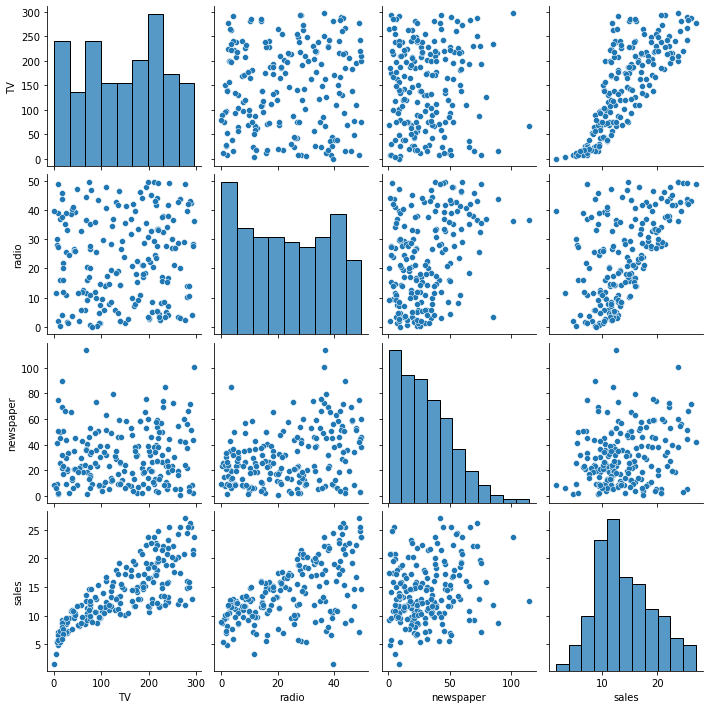

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='TV', ylabel='sales'>

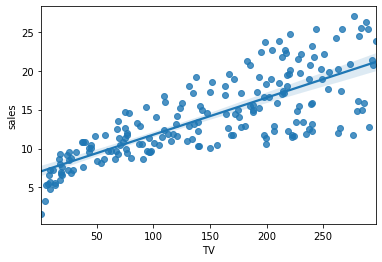

In [12]:
# sns.scatterplot(x = 'TV', y = 'sales',data = df)
sns.regplot(x = 'TV', y = 'sales',data = df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

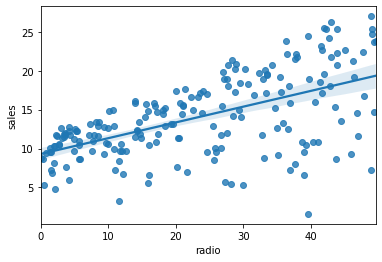

In [13]:
sns.regplot(x = 'radio', y = 'sales',data = df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

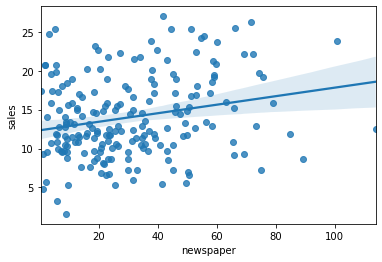

In [14]:
sns.regplot(x = 'newspaper', y = 'sales',data = df)

# Temperory Model 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()


# Evaluation of the temp model

In [22]:
test_predictions = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [25]:
MAE

1.2137457736144808

In [26]:
MSE

2.298716697886378

In [27]:
RMSE

1.5161519375993877

<AxesSubplot:xlabel='sales'>

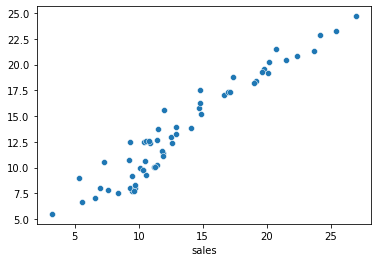

In [31]:
sns.scatterplot(x = y_test, y = test_predictions)

In [38]:
residuals = y_test - test_predictions
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

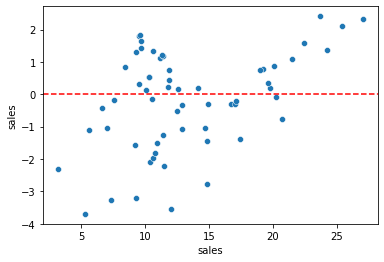

In [34]:
sns.scatterplot(x=y_test, y = residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

# MODEL

In [35]:
Final_model = LinearRegression()

In [36]:
Final_model.fit(X,y)

LinearRegression()

In [37]:
from joblib import dump,load

In [39]:
dump(Final_model, 'final_sales.joblib')

['final_sales.joblib']

In [40]:
loaded_model = load("final_sales.joblib")

In [41]:
campaign = [[149,22,12]]

In [42]:
loaded_model.predict(campaign)

array([13.893032])